## Module: Fundamentals of Data Analysis

## Project: Normal Distribution

## Contents
1. [Introduction](#Introduction)<br>
    i. [An explanation of the Normal Distribution](#an-explanation-of-the-Normal-Distribution)<br>
    ii.[Terms used](#terms-used)<br>
2. [The Empirical Rule](#the-Emperical-Rule)<br>
3. [The Central Limit Theorem](#The-Central-Limit-Theorem)
4. [Construction of a Normal Distribution](#Construction-of-a-Normal-Distribution)

In [12]:
# Import required libraries
# Numerical analysis, statistics
import numpy as np
from numpy.random import default_rng
from scipy.stats import norm

import collections

import tensorflow as tf

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction

### An explanation of the Normal Distribution 

A Normal distribution is also known as a Gaussian distribution. One of the characteristics of the Normal distribution is that it's symetrical about the mean, which means that data near the mean occurs more frequently than data far away from the mean. 

Because of this, it's more commonly known as a "bell curve", because of the visual shape of the plot.

Another characteristic of the normal distribution is that the mean is 0 and the standard deviation determines the width of the distribution.
Some natural phenomena follow a normal distribution, like the height of a population in a country.

### Terms used

mean = average<br>
median = midpoint<br>
mode = most frequent observation<br>

In a Normal distribution, 
mean = median = mode
i.e, they're all equal to one another and they represent the highest point of the distribution.

**Variance**
The distance of each data point from the mean.

**Standard Deviation**
The measure of the amount of variation of a dataset.
Standard deviation is the square root of variance.

**Skewness**
This is a term used to measure the degree of symetry about the mean of a Normal distribution.
A normal distribution is symmetrical and has a skewness of zero.

If the distribution is left-skewed (negative skewness) then the left tail of the distribution is longer than the right tail.
Right-skewed distributions have a right tail that is longer than the left tail.

**Kurtosis**
Kurtosis is a term used to measure the weight of a distribution's tails relative to the median.
In a normal distribution, kurtosis = 3.0 and is known as *mesokurtic*. <br>
A *Leptokurtic* distribution is also known as having 'fat tails', i.e. kurtosis is greater than 3.0 and will likely have a 'skinny' centre.<br>
A *Platykurtic* distribution will have a kurtosis value of less than 3.0, and have 'skinny tails'.

**Probability Density Function**
More commonly referred to as a PDF, it's used to find the probability of a variable falling within a range of values, as opposed to determining one particular value.

## The Empirical Rule

The empirical rule is also known as *the three-sigma rule* or *68-95-99.7 rule*.
This rule states that statistically, for a normal distribution, the majority of the data under observation will fall within three standard deviations.
- 68% of data observed will fall in the first standard deviation;
- 95% of data observed will fall in the first two standard deviations;
- 99.7% of data observed will fall in the first three standard deviations.

The empirical rule can be used as a way to test how 'normal' a distribution is - i.e. if it looks like a bell curve, but when analysed further, isn't a perfect normal distribution.
Outliers can also be found when using the empirical rule, especially if 99.7% of data falls within three standard deviations.

The probability density function of the normal distribution is:

$p(x)$ = $\frac{1}{\sqrt{2\pi\sigma^2}}e^-\frac{(x-\mu)^2}{2\sigma}$

Where:<br>
$x$ is the data under consideration;<br>
$p(x)$ is the probability function;<br>
$\mu$ is the *mean*;<br>
$\sigma$ is the *standard deviation*.

## Central Limit Theorem

The [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) states that when many independent variables are summed up, the *normalised* sum tends towards a normal distribution even if the original variables themselves aren't normally distributed.

This is regarded as a fundamental concept in probability theory because it infers that probabilistic and statistical methods that can be applied to normal distributions can also be applied to other problems that involve other types of probability distributions.

## Construction of a Normal Distribution

Creating a normal distribution using Numpy:
We need to specify $\mu$ (mean), $\sigma$ (standard deviation) and the amount of samples.

In [2]:
mu, sigma = 0, 0.1 # mean and standard deviation
# 1000 samples
s = np.random.normal(mu, sigma, 1000)

In [3]:
# verify the mean
abs(mu - np.mean(s))

0.00015370102416468312

In [4]:
# verify the variance
abs(sigma - np.std(s, ddof=1))

0.0018202554935664722

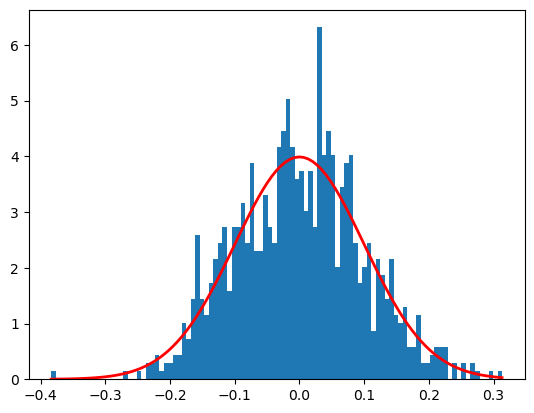

In [5]:
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

Creating a normal distribution using sci-py:

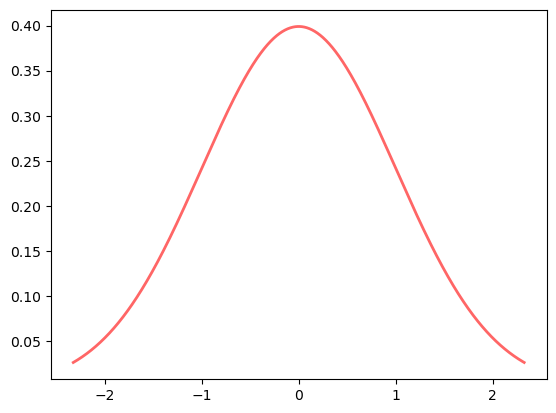

In [6]:
# specify the plot size
fig, ax = plt.subplots(1, 1)

# Calculate the first four moments - note the 'mvsk' letters
mean, var, skew, kurt = norm.stats(moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 1000)
ax.plot(x, norm.pdf(x),
       'r-', lw=2, alpha=0.6, label='norm pdf')

### Multiple Normal Distributions

The normal distributions below have the same means (0) but different standard deviations ranging from 1 to 3.

In [8]:
# Generate range of x values from -10 to 10 in 0.001 steps
x = np.arange(-10, 10, 0.001)

In [55]:
# Generate probability density functions (pdfs with mean of 0, and std from 1 to 3)
x1 = norm.pdf(x, 0, 1)
x2 = norm.pdf(x, 0, 2)
x3 = norm.pdf(x, 0, 3)

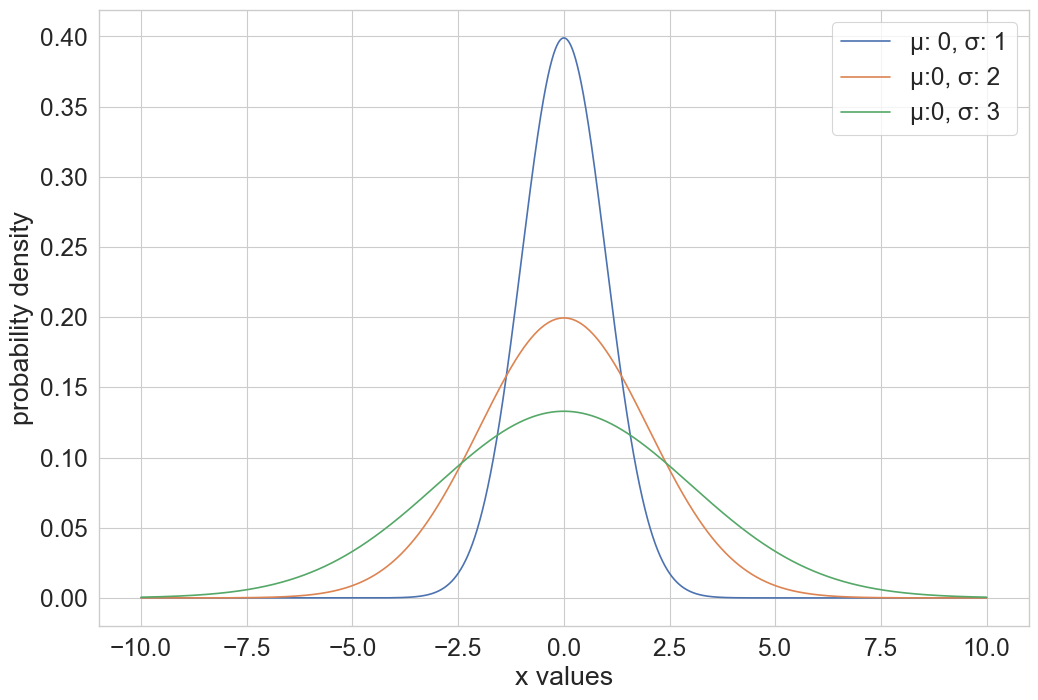

In [62]:
# Set seaborn plot style
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 8))

# Input data
ax = sns.lineplot(x = x, y=x1, label='μ: 0, σ: 1')
ax = sns.lineplot(x = x, y=x2, label='μ:0, σ: 2')
ax = sns.lineplot(x = x, y=x3, label='μ:0, σ: 3')

# X and Y axis labels
ax.set(xlabel = "x values", ylabel = "probability density")
# To get rid of the text at top of the graph
plt.show()

So from examining the plots above, the larger standard deviation shows that the data is spread out more.<br>
The plot with a $\mu$ of 0 and $\sigma$ of 1 is known as a *standardised normal distribution*

### Conclusion

### References

1. [Numpy's definition of a normal distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal)
2. [Wikipedia's explanation of Kurtosis](https://en.wikipedia.org/wiki/Kurtosis)
3. [The empirical rule](https://www.investopedia.com/terms/e/empirical-rule.asp)
4. [The Central LImit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)
